In [2]:
import pandas as pd
from ETL import ETL
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dataset/2012.csv')

In [4]:
df = ETL(df)

c:\Users\dswal\Desktop\Data-Science-Project\ETL.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'FL_MON'] = df['FL_DATE'].apply(lambda x: x.month)
c:\Users\dswal\Desktop\Data-Science-Project\ETL.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'FL_DAY'] = df['FL_DATE'].apply(lambda x: x.day)
c:\Users\dswal\Desktop\Data-Science-Project\ETL.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

## Data Visualization

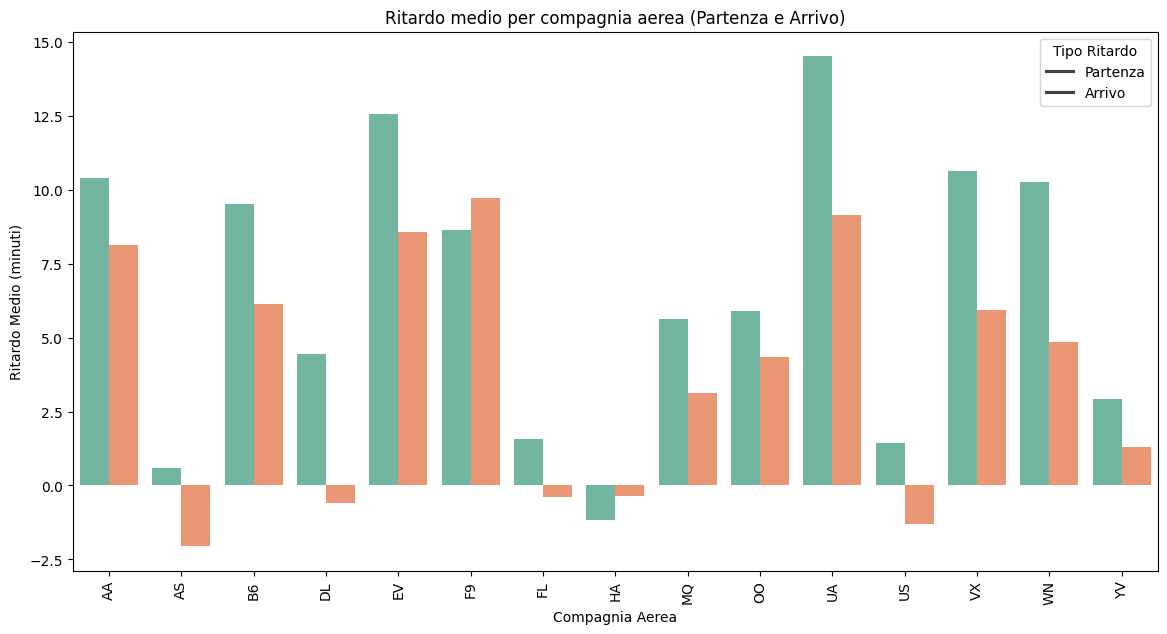

In [64]:
# Calcolo dei ritardi medi per compagnia aerea (sia in partenza che in arrivo)
carrier_delays = df.groupby('OP_CARRIER').agg({
    'DEP_DELAY': 'mean',  # Media dei ritardi di partenza
    'ARR_DELAY': 'mean'   # Media dei ritardi di arrivo
}).reset_index()

# Ristruttura i dati per facilitare la visualizzazione con un grafico a barre raggruppato
carrier_delays_melted = carrier_delays.melt(id_vars='OP_CARRIER', 
                                            value_vars=['DEP_DELAY', 'ARR_DELAY'], 
                                            var_name='Tipo Ritardo', 
                                            value_name='Ritardo Medio')

# Visualizzazione combinata con palette Set2
plt.figure(figsize=(14, 7))
sns.barplot(x='OP_CARRIER', y='Ritardo Medio', hue='Tipo Ritardo', data=carrier_delays_melted, palette='Set2')
plt.title('Ritardo medio per compagnia aerea (Partenza e Arrivo)')
plt.xlabel('Compagnia Aerea')
plt.ylabel('Ritardo Medio (minuti)')
plt.xticks(rotation=90)
plt.legend(title='Tipo Ritardo', labels=['Partenza', 'Arrivo'])
plt.show()


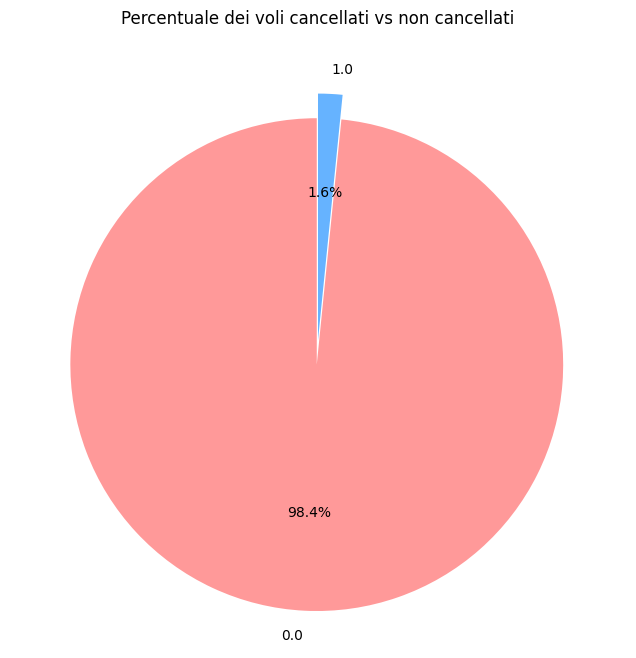

In [41]:
# Conta i valori unici nella colonna 'CANCELLED' (0 e 1)
cancellati = df['CANCELLED'].value_counts()

# Crea un grafico a torta con evidenziazione
plt.figure(figsize=(8, 8))
colors = ['#ff9999', '#66b3ff']  # Colori per non cancellati e cancellati
explode = (0.1, 0)  # Metti in evidenza il segmento cancellato con un'esplosione

# Crea il grafico
plt.pie(cancellati, labels=cancellati.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)

# Aggiungi un titolo
plt.title('Percentuale dei voli cancellati vs non cancellati')

# Mostra il grafico
plt.show()


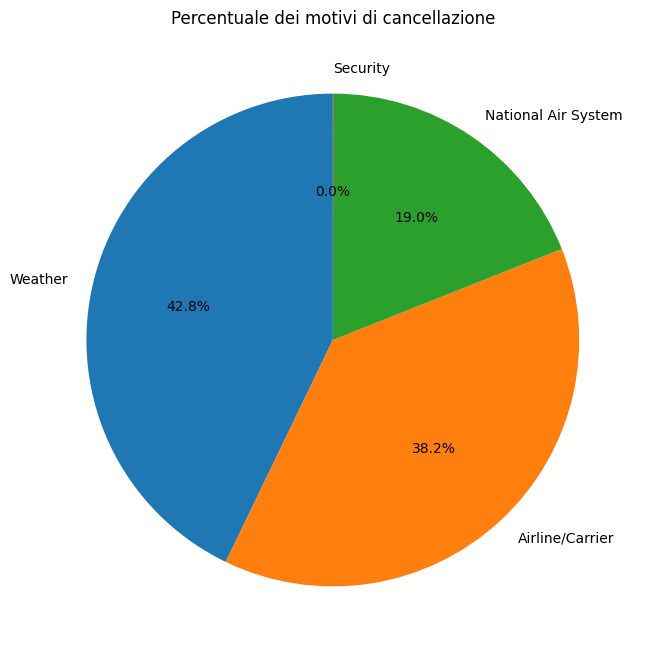

In [66]:
# Conta i valori unici nella colonna 'CANCELLED' (0 e 1)
cancellati = df['CANCELLATION_REASON'].value_counts()

# Crea un grafico a torta con evidenziazione
plt.figure(figsize=(8, 8))
explode = (0.1, 0)  # Metti in evidenza il segmento cancellato con un'esplosione

# Crea il grafico
plt.pie(cancellati, labels=cancellati.index, autopct='%1.1f%%', startangle=90)

# Aggiungi un titolo
plt.title('Percentuale dei motivi di cancellazione')

# Mostra il grafico
plt.show()


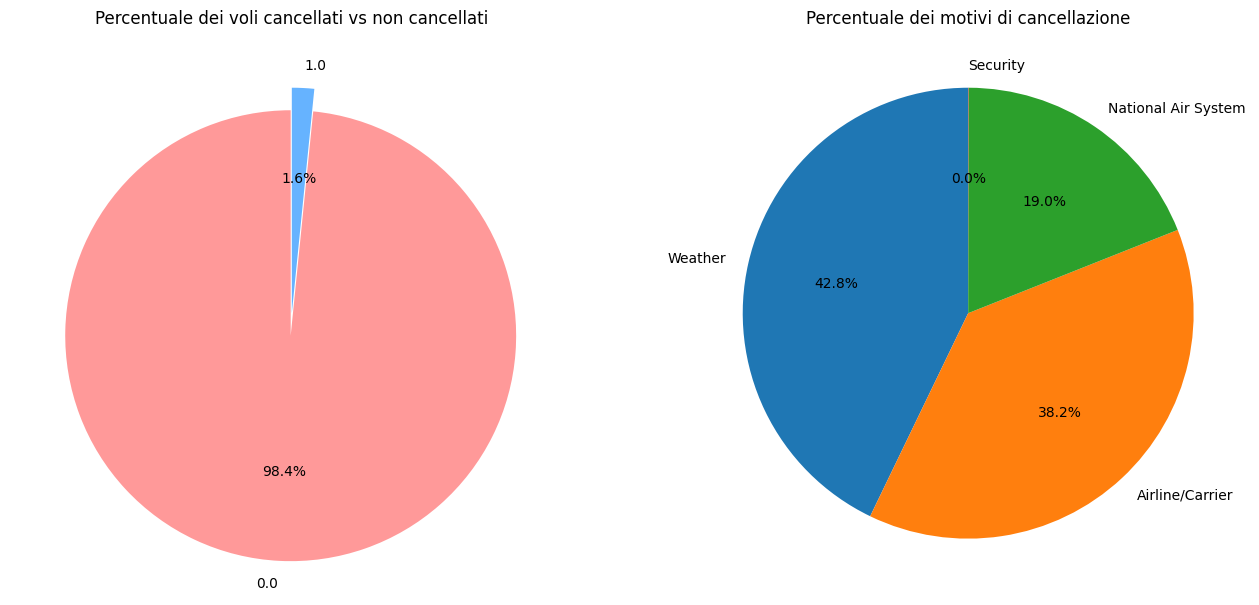

In [68]:
import matplotlib.pyplot as plt

# Conta i valori unici nella colonna 'CANCELLED' (0 e 1)
cancellati = df['CANCELLED'].value_counts()

# Conta i valori unici nella colonna 'CANCELLATION_REASON'
motivi_cancellazione = df['CANCELLATION_REASON'].value_counts()

# Crea una figura con due sottotrame affiancate
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))  # 1 riga, 2 colonne

# Grafico a torta per i voli cancellati vs non cancellati
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # Metti in evidenza il segmento cancellato
ax1.pie(cancellati, labels=cancellati.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
ax1.set_title('Percentuale dei voli cancellati vs non cancellati')

# Grafico a torta per i motivi di cancellazione
ax2.pie(motivi_cancellazione, labels=motivi_cancellazione.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Percentuale dei motivi di cancellazione')

# Mostra il grafico
plt.show()


C:\Users\dswal\AppData\Local\Temp\ipykernel_19776\3184558394.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OP_CARRIER', y='Cancellazioni', data=carrier_cancellations, palette='magma')


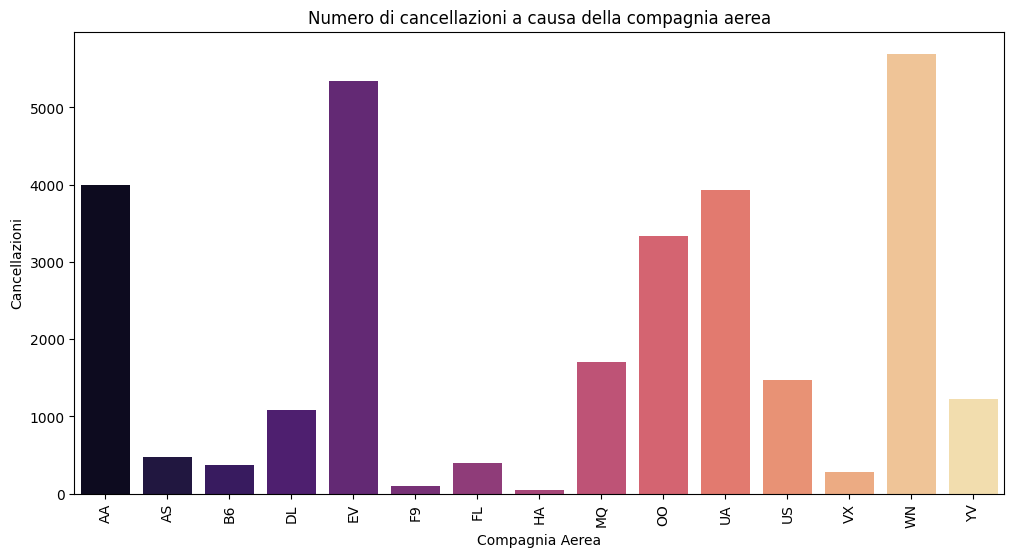

In [45]:
# Calcolo delle cancellazioni per compagnia aerea (a causa della compagnia stessa)
carrier_cancellations = df[df['CANCELLATION_REASON'] == 'Airline/Carrier'].groupby('OP_CARRIER').size().reset_index(name='Cancellazioni')

# Creazione del grafico
plt.figure(figsize=(12, 6))
sns.barplot(x='OP_CARRIER', y='Cancellazioni', data=carrier_cancellations, palette='magma')
plt.title('Numero di cancellazioni a causa della compagnia aerea')
plt.xlabel('Compagnia Aerea')
plt.xticks(rotation=90)
plt.show()


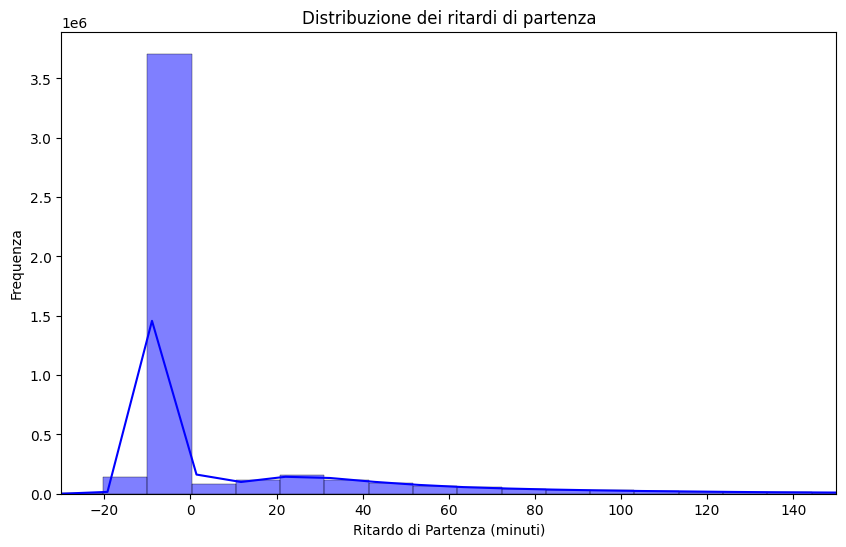

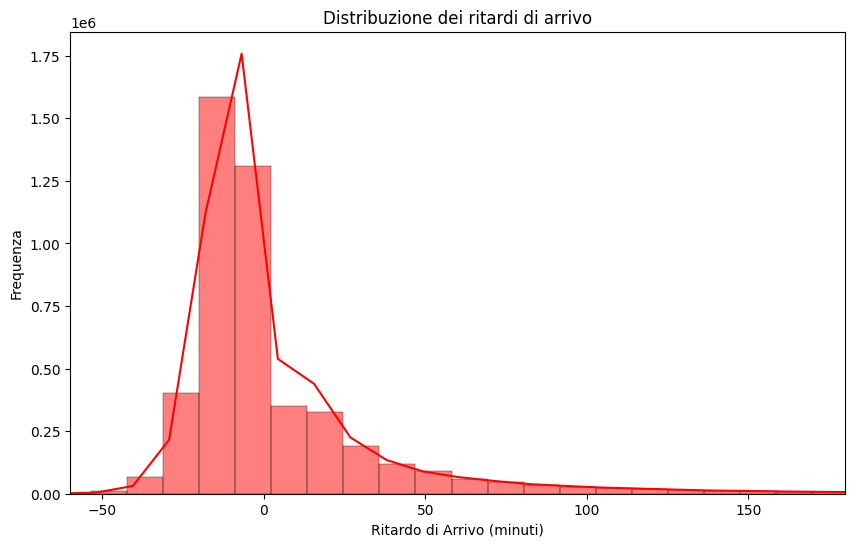

In [10]:
# Distribuzione dei ritardi di partenza
plt.figure(figsize=(10, 6))
sns.histplot(df['DEP_DELAY'], bins=200, kde=True, color='blue', kde_kws={'bw_adjust': 0.3})
plt.title('Distribuzione dei ritardi di partenza')
plt.xlabel('Ritardo di Partenza (minuti)')
plt.ylabel('Frequenza')
plt.xlim(-30, 150)  # Limitare l'asse x per concentrarsi sui valori centrali
plt.show()

# Distribuzione dei ritardi di arrivo
plt.figure(figsize=(10, 6))
sns.histplot(df['ARR_DELAY'], bins=200, kde=True, color='red', kde_kws={'bw_adjust': 0.3})
plt.title('Distribuzione dei ritardi di arrivo')
plt.xlabel('Ritardo di Arrivo (minuti)')
plt.ylabel('Frequenza')
plt.xlim(-60, 180)  # Limitare l'asse x per concentrarsi sui valori centrali
plt.show()


C:\Users\dswal\AppData\Local\Temp\ipykernel_19776\3392228368.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DEP_DELAY', y='ORIGIN', data=airport_delays_origin_top_mean, palette='plasma')


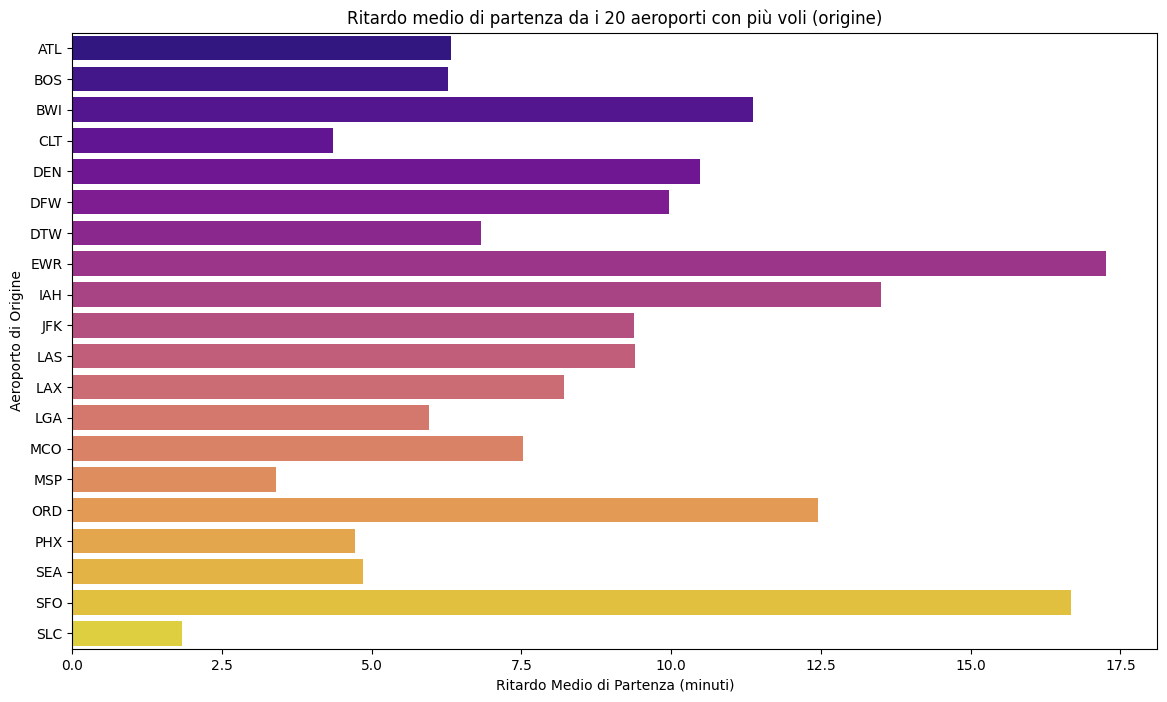

C:\Users\dswal\AppData\Local\Temp\ipykernel_19776\3392228368.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ARR_DELAY', y='ORIGIN', data=airport_delays_origin_top_mean, palette='coolwarm')


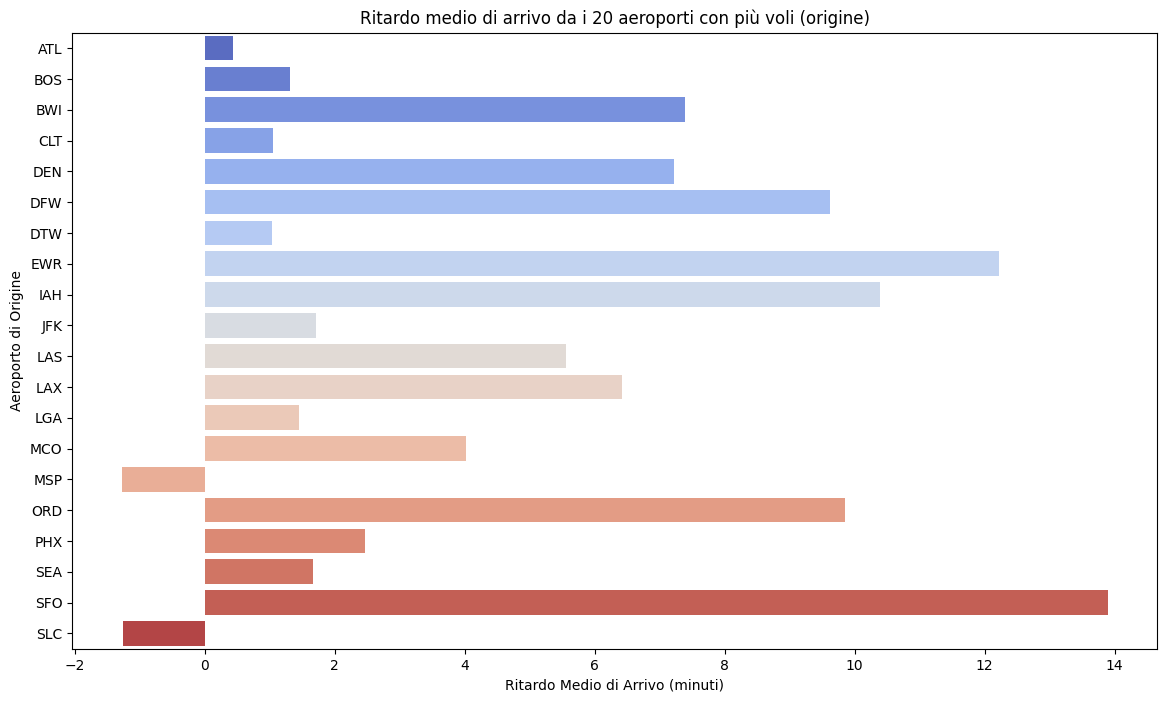

C:\Users\dswal\AppData\Local\Temp\ipykernel_19776\3392228368.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DEP_DELAY', y='DEST', data=airport_delays_dest_top_mean, palette='cividis')


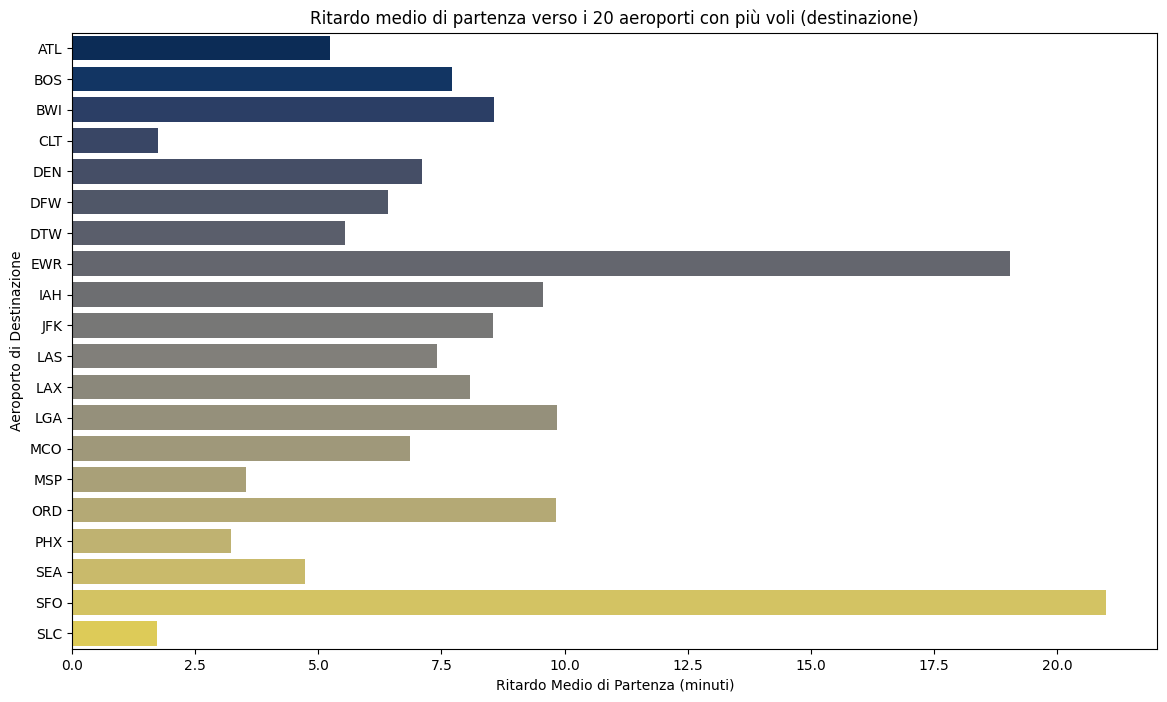

C:\Users\dswal\AppData\Local\Temp\ipykernel_19776\3392228368.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ARR_DELAY', y='DEST', data=airport_delays_dest_top_mean, palette='Spectral')


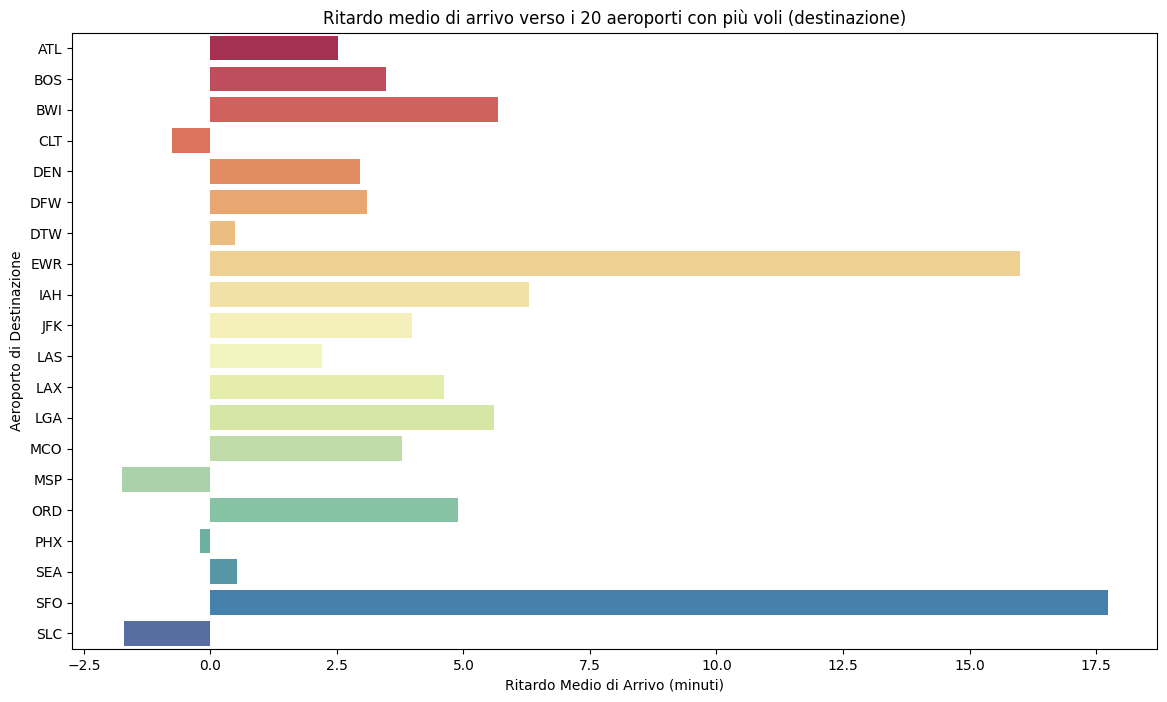

In [49]:
# Calcola il numero di voli per ogni aeroporto di origine
airport_flights_origin = df.groupby('ORIGIN').size().reset_index(name='num_flights')

# Ordina per numero di voli e seleziona i primi 20 aeroporti
top_airports_origin_by_flights = airport_flights_origin.nlargest(20, 'num_flights')

# Calcola i ritardi medi di partenza e arrivo per i primi 20 aeroporti di origine
airport_delays_origin_top = df[df['ORIGIN'].isin(top_airports_origin_by_flights['ORIGIN'])]
airport_delays_origin_top_mean = airport_delays_origin_top.groupby('ORIGIN').agg({
    'DEP_DELAY': 'mean',  # Media dei ritardi di partenza
    'ARR_DELAY': 'mean'   # Media dei ritardi di arrivo
}).reset_index()

# Visualizzazione dei ritardi medi di partenza per i primi 20 aeroporti di origine
plt.figure(figsize=(14, 8))
sns.barplot(x='DEP_DELAY', y='ORIGIN', data=airport_delays_origin_top_mean, palette='plasma')
plt.title('Ritardo medio di partenza da i 20 aeroporti con più voli (origine)')
plt.xlabel('Ritardo Medio di Partenza (minuti)')
plt.ylabel('Aeroporto di Origine')
plt.show()

# Visualizzazione dei ritardi medi di arrivo per i primi 20 aeroporti di origine
plt.figure(figsize=(14, 8))
sns.barplot(x='ARR_DELAY', y='ORIGIN', data=airport_delays_origin_top_mean, palette='coolwarm')
plt.title('Ritardo medio di arrivo da i 20 aeroporti con più voli (origine)')
plt.xlabel('Ritardo Medio di Arrivo (minuti)')
plt.ylabel('Aeroporto di Origine')
plt.show()


# Calcola il numero di voli per ogni aeroporto di destinazione
airport_flights_dest = df.groupby('DEST').size().reset_index(name='num_flights')

# Ordina per numero di voli e seleziona i primi 20 aeroporti
top_airports_dest_by_flights = airport_flights_dest.nlargest(20, 'num_flights')

# Calcola i ritardi medi di partenza e arrivo per i primi 20 aeroporti di destinazione
airport_delays_dest_top = df[df['DEST'].isin(top_airports_dest_by_flights['DEST'])]
airport_delays_dest_top_mean = airport_delays_dest_top.groupby('DEST').agg({
    'DEP_DELAY': 'mean',  # Media dei ritardi di partenza
    'ARR_DELAY': 'mean'   # Media dei ritardi di arrivo
}).reset_index()

# Visualizzazione dei ritardi medi di partenza per i primi 20 aeroporti di destinazione
plt.figure(figsize=(14, 8))
sns.barplot(x='DEP_DELAY', y='DEST', data=airport_delays_dest_top_mean, palette='cividis')
plt.title('Ritardo medio di partenza verso i 20 aeroporti con più voli (destinazione)')
plt.xlabel('Ritardo Medio di Partenza (minuti)')
plt.ylabel('Aeroporto di Destinazione')
plt.show()

# Visualizzazione dei ritardi medi di arrivo per i primi 20 aeroporti di destinazione
plt.figure(figsize=(14, 8))
sns.barplot(x='ARR_DELAY', y='DEST', data=airport_delays_dest_top_mean, palette='Spectral')
plt.title('Ritardo medio di arrivo verso i 20 aeroporti con più voli (destinazione)')
plt.xlabel('Ritardo Medio di Arrivo (minuti)')
plt.ylabel('Aeroporto di Destinazione')
plt.show()


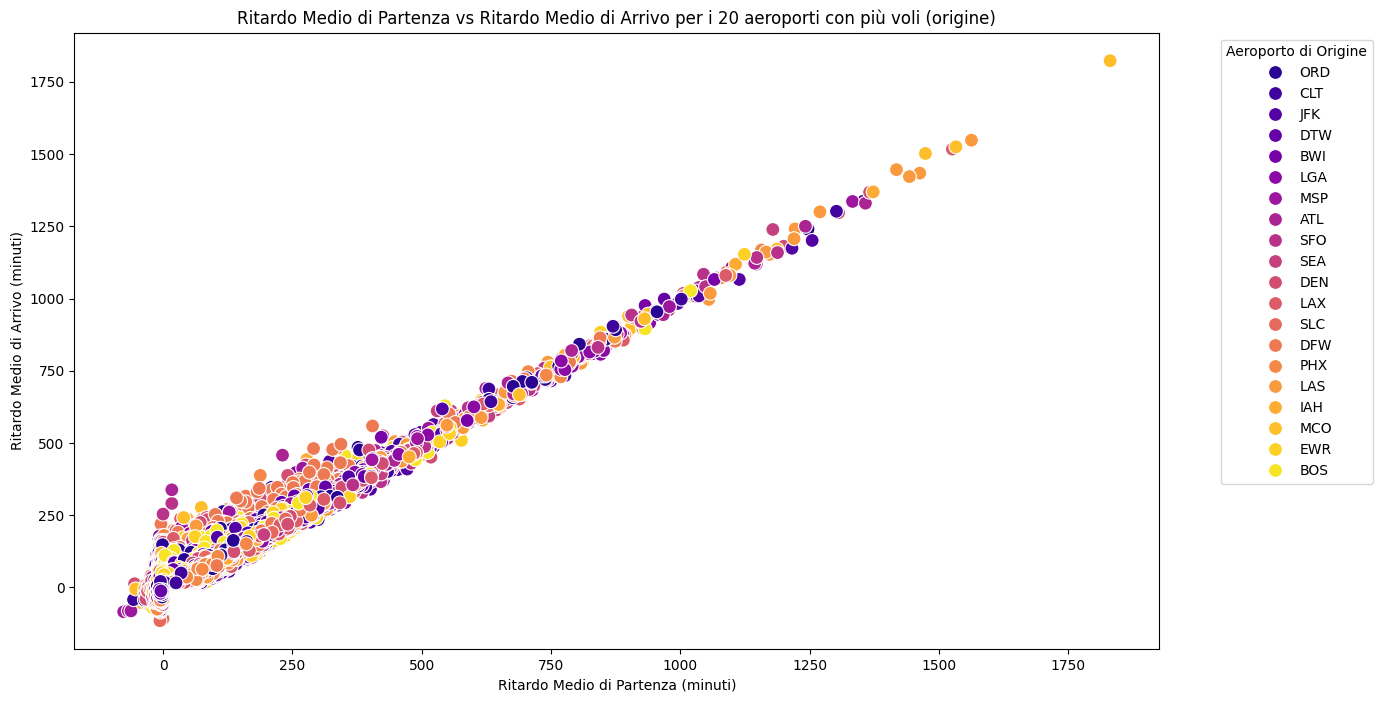

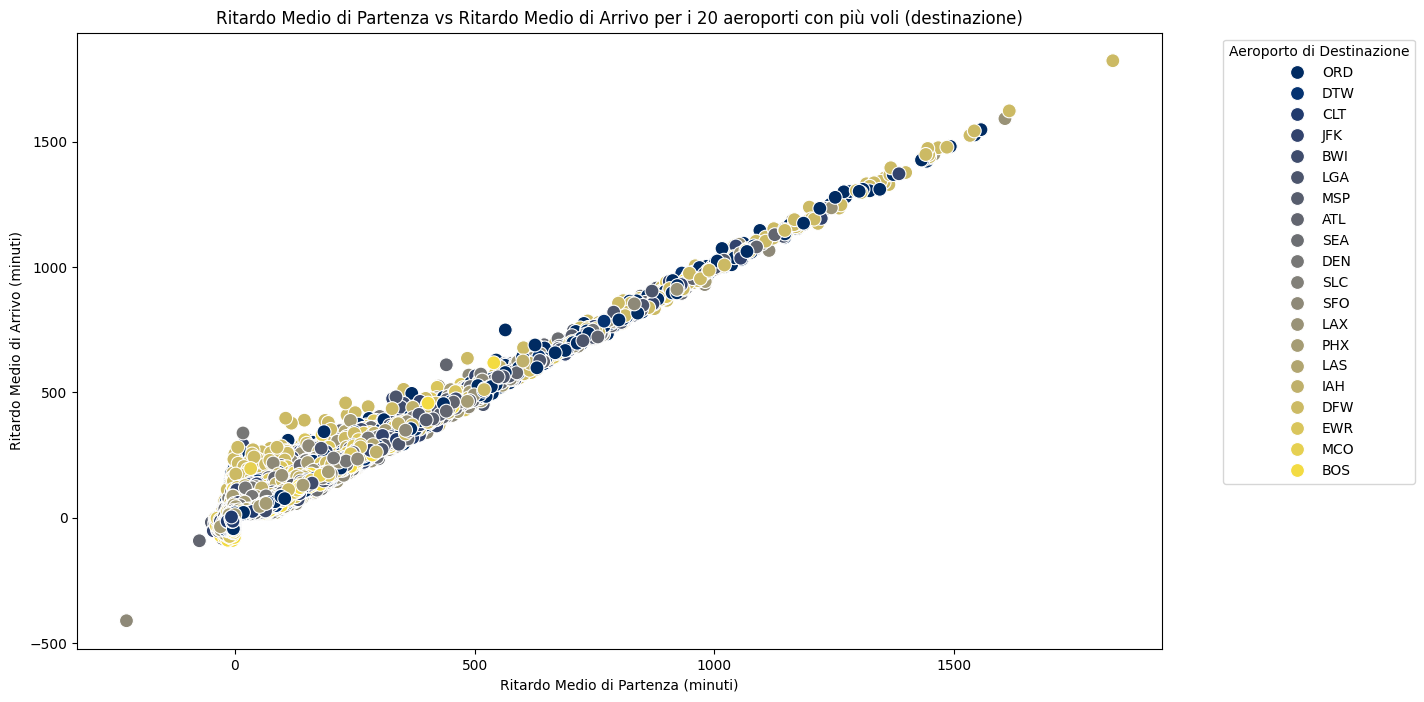

In [ ]:
# Visualizzazione dei ritardi medi di partenza vs ritardi medi di arrivo per i primi 20 aeroporti di origine
plt.figure(figsize=(14, 8))
sns.scatterplot(x='DEP_DELAY', y='ARR_DELAY', data=airport_delays_origin_top, hue='ORIGIN', palette='plasma', s=100)
plt.title('Ritardi di Partenza vs Ritardi di Arrivo per i 20 aeroporti con più voli (origine)')
plt.xlabel('Ritardo di Partenza (minuti)')
plt.ylabel('Ritardo di Arrivo (minuti)')
plt.legend(title='Aeroporto di Origine', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Visualizzazione dei ritardi medi di partenza vs ritardi medi di arrivo per i primi 20 aeroporti di destinazione
plt.figure(figsize=(14, 8))
sns.scatterplot(x='DEP_DELAY', y='ARR_DELAY', data=airport_delays_dest_top, hue='DEST', palette='cividis', s=100)
plt.title('Ritardi di Partenza vs Ritardi di Arrivo per i 20 aeroporti con più voli (destinazione)')
plt.xlabel('Ritardo di Partenza dall\'origine (minuti) ')
plt.ylabel('Ritardo di Arrivo a destinazione (minuti)')
plt.legend(title='Aeroporto di Destinazione', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


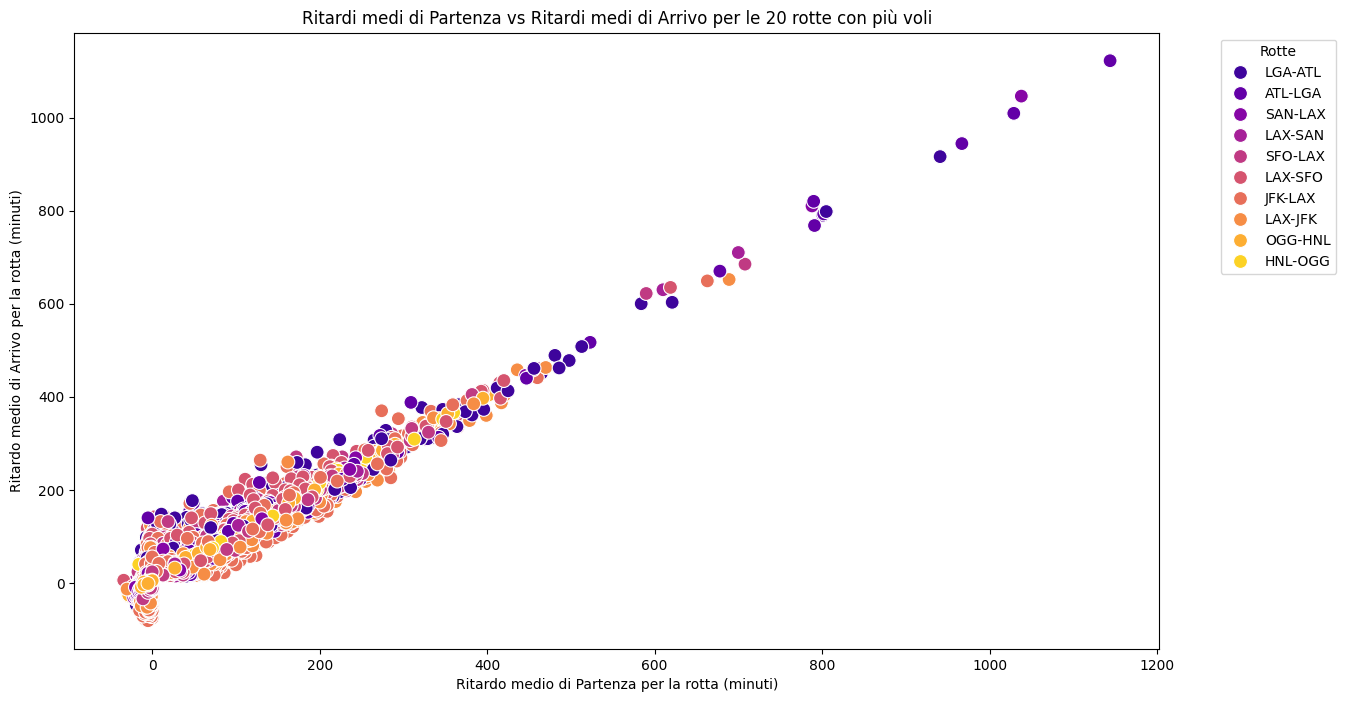

In [ ]:
# Calcolo delle rotte tra aeroporti con conteggio dei voli
airport_routes = df.groupby(['ORIGIN', 'DEST']).size().reset_index(name='num_flights')

# Seleziona le prime 20 rotte con più voli
top_airports_routes_by_flights = airport_routes.nlargest(10, 'num_flights')

# Filtra i dati originali per ottenere solo i voli delle prime 20 rotte
airport_delays_routes_top = df.merge(top_airports_routes_by_flights, on=['ORIGIN', 'DEST'])

# Crea una nuova colonna per combinare ORIGIN e DEST in un unico identificatore di rotta
airport_delays_routes_top['route'] = airport_delays_routes_top['ORIGIN'] + '-' + airport_delays_routes_top['DEST']

# Visualizzazione dei ritardi di partenza vs ritardi di arrivo per le prime 20 rotte
plt.figure(figsize=(14, 8))
sns.scatterplot(x='DEP_DELAY', y='ARR_DELAY', data=airport_delays_routes_top, hue='route', palette='plasma', s=100)
plt.title('Ritardi medi di Partenza vs Ritardi medi di Arrivo per le 10 rotte con più voli')
plt.xlabel('Ritardo medio di Partenza per la rotta (minuti)')
plt.ylabel('Ritardo medio di Arrivo per la rotta (minuti)')
plt.legend(title='Rotte', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()